In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
import cPickle as pickle
import KNearestNeighbor as KNN

In [27]:
def load_CIFAR_train(filename):
  """ load single batch of cifar """
  with open(filename, 'rb') as f:
    datadict = pickle.load(f)
    X = datadict['data']
    Y = datadict['coarse_labels']
    X = X.reshape(50000, 3, 32, 32).transpose(0,2,3,1).astype("float")
    X = np.array(X)
    Y = np.array(Y)
    return X, Y
def load_CIFAR_test(filename):
  """ load single batch of cifar """
  with open(filename, 'rb') as f:
    datadict = pickle.load(f)
    X = datadict['data']
    Y = datadict['coarse_labels']
    X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
    X = np.array(X)
    Y = np.array(Y)
    return X, Y

In [6]:
def sample_train(train_data, train_labels):
    train_data = np.reshape(train_data, (train_data.shape[0], -1))
    labels_indices = np.array([], dtype=int)
    for i in range(0,20):
        temp_indices = np.flatnonzero(train_labels == i)  
        temp_indices = np.random.choice(temp_indices, 500, replace = False)
        labels_indices = np.append(labels_indices,temp_indices)
    

    np.random.shuffle(labels_indices)
    train_data = train_data[labels_indices,:]
    train_labels = train_labels[labels_indices]
    
    return train_data, train_labels

In [7]:
def crossfold(train_data,train_labels,i):
    if i == 1:
        validation_data = train_data[:3333]
        new_train_data = np.concatenate((train_data[3334:6666], train_data[6667:]))
        validation_labels = train_labels[:3333]
        new_train_labels = np.concatenate((train_labels[3334:6666], train_labels[6667:]))
    elif i == 2:
        validation_data = train_data[3334:6666]
        new_train_data = np.concatenate((train_data[:3333], train_data[6667:]))
        validation_labels = train_labels[3334:6666]
        new_train_labels = np.concatenate((train_labels[:3333], train_labels[6667:]))
    else:
        validation_data = train_data[6667:]
        new_train_data = np.concatenate((train_data[:3333], train_data[3334:6666]))
        validation_labels = train_labels[6667:]
        new_train_labels = np.concatenate(( train_labels[:3333], train_labels[3334:6666]))
    return validation_data,validation_labels, new_train_data,new_train_labels
        

In [10]:
train_data, train_labels = load_CIFAR_train('train')
train_data, train_labels = sample_train(train_data,train_labels)
print (train_data.shape,train_labels.shape)
#train_data, train_labels = shuffle(train_data, train_labels, random_state = 0)
k = [1, 3, 5, 7, 10, 15,20, 25,50, 75,100,150]
KNNclassifier = KNN.KNearestNeighbor()
kaccuracy = []
num_test = 3333

for l in k:
    crossval_accuracy = np.array([],dtype = float)
    for i in range (1, 4):
        val_data, val_labels, new_train_data,new_train_labels = crossfold(train_data,train_labels,i)
    #    print (train_data.shape)
       # print (train_data)
        KNNclassifier.train(new_train_data,new_train_labels)
        # Predict the labels of testing data
        y_test_pred = KNNclassifier.predict(val_data,l,'L2')
        # Compute and print the fraction of correctly predicted examples
        num_correct = np.sum(y_test_pred == val_labels)
        accuracy = float(num_correct) / num_test
        crossval_accuracy = np.append(crossval_accuracy, accuracy)
        print 'Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy)
    mean_accuracy = np.mean(crossval_accuracy)
    print '!!Average accuracy for k = %d : %f' % (l, mean_accuracy)
    kaccuracy = np.append(kaccuracy,mean_accuracy)


((10000, 3072), (10000,))
Got 660 / 3333 correct => accuracy: 0.198020
Got 601 / 3333 correct => accuracy: 0.180318
Got 639 / 3333 correct => accuracy: 0.191719
!!Average accuracy for k = 1 : 0.190019
Got 654 / 3333 correct => accuracy: 0.196220
Got 573 / 3333 correct => accuracy: 0.171917
Got 610 / 3333 correct => accuracy: 0.183018
!!Average accuracy for k = 3 : 0.183718
Got 647 / 3333 correct => accuracy: 0.194119
Got 632 / 3333 correct => accuracy: 0.189619
Got 616 / 3333 correct => accuracy: 0.184818
!!Average accuracy for k = 5 : 0.189519
Got 663 / 3333 correct => accuracy: 0.198920
Got 632 / 3333 correct => accuracy: 0.189619
Got 620 / 3333 correct => accuracy: 0.186019
!!Average accuracy for k = 7 : 0.191519
Got 673 / 3333 correct => accuracy: 0.201920
Got 631 / 3333 correct => accuracy: 0.189319
Got 638 / 3333 correct => accuracy: 0.191419
!!Average accuracy for k = 10 : 0.194219
Got 656 / 3333 correct => accuracy: 0.196820
Got 655 / 3333 correct => accuracy: 0.196520
Got 650 

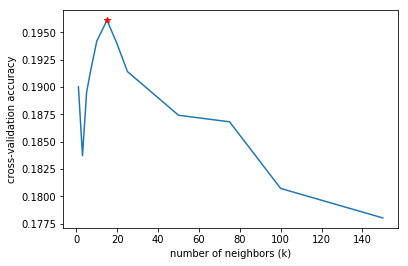

In [15]:
plt.plot(k,kaccuracy)
plt.plot(k[5], np.amax(kaccuracy), 'r*')
plt.xlabel("number of neighbors (k)")
plt.ylabel("cross-validation accuracy")

plt.show()